In [1]:
import os
import pybedtools
import pandas as pd
import seaborn as sns
import re
from functools import reduce
from itertools import combinations
import matplotlib.pyplot as plt
import upsetplot

# Our data

In [2]:
main_file = "../../4_peak_call/data/CC/starrpeaker/peaks.peak.final.bed" # TODO: edit to relative path after copying

In [3]:
def get_decimals(frac):
    pattern = re.compile("^0\.(\d+)")
    m = re.match(pattern, frac)
    return m.group(1)

In [4]:
FRAC = list(map(lambda x: str(round(x/100, 2)),range(10, 100, 5)))
RSEED = list(map(str,range(1,4)))

subsampled_lib_peaks_dir = "../data/reproducible_peaks/CC" 
f_and_r = ["_".join([get_decimals(f), r]) for f in FRAC for r in RSEED]
other_files = [os.path.join(subsampled_lib_peaks_dir, fr, "starrpeaker.peak.final.bed") for fr in f_and_r]

In [5]:
intersecting_numbers = []
for of in other_files:
    mf_bed = pybedtools.BedTool(main_file)
    of_bed = pybedtools.BedTool(of)
    intersecting_numbers.append(mf_bed.intersect(of_bed, u=True).count())

In [6]:
random_seeds = [i for j in range(len(FRAC)) for i in range(1,4)]
fractional_coverage = [float(i) for i in FRAC for j in range(3)]
reproducible_peaks = intersecting_numbers

In [7]:
df = pd.DataFrame({
    "Number of reproducible peaks":reproducible_peaks,
    "Fractional coverage":fractional_coverage,
    "random_seeds":random_seeds
})

In [8]:
df["Percentage of reproducible peaks"] = (df["Number of reproducible peaks"]*100)/len(mf_bed)
df["Coverage"] = df["Fractional coverage"]*280

In [12]:
# df.to_csv(os.path.join(subsampled_lib_peaks_dir, "reproducible_peaks.csv"))

# Figure 3D

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


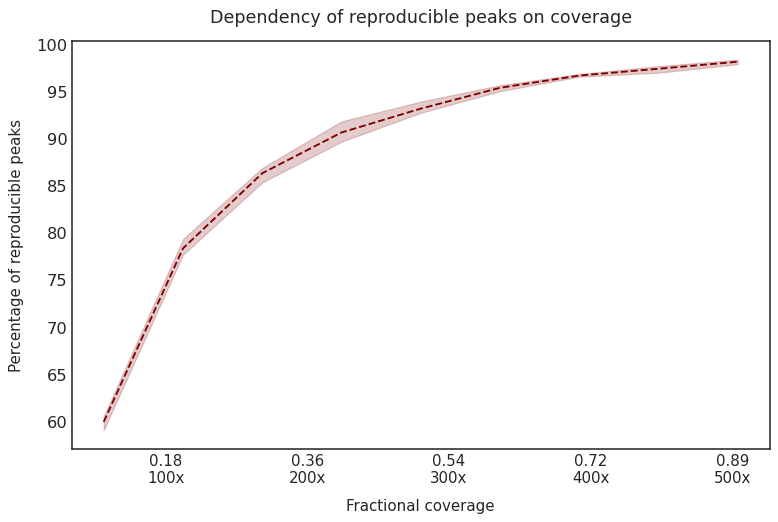

In [9]:
plt.figure(figsize=(10,6), dpi=90)
plt.style.use('seaborn-white')
plt.title("Dependency of reproducible peaks on coverage", fontsize=14, fontfamily="arial", pad=15)
sns.lineplot(data=df, x="Coverage", y="Percentage of reproducible peaks", markers=True, color="maroon", linestyle="dashed")
# plt.xticks([50, 100, 150, 200, 250],["0.18\n50x", "0.36\n100x", "0.54\n150x", "0.72\n200x", "0.89\n250x"], fontsize=12)
plt.yticks(fontsize=13)
plt.xlabel("Coverage (%)", fontsize=12, fontfamily="arial", labelpad=10)
plt.ylabel("Reproducible peaks (%)", fontsize=12, fontfamily="arial", labelpad=10);
# plt.margins(0.05);